# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

The most profitable item would be the item that has the highest product based on a formula that looks like this: Total Profit = (State Bottle Retail - State Bottle Cost) * Quantity of Items Sold. This formula measures the amount of profit received from a particular item across all sales of that item. 

In [88]:
import pandas as pd 
import matplotlib.pyplot as plt 

iowa = pd.read_csv('/Users/bellalu/DS 5030/DS5030UnderstandingUncertainty/data/iowa.csv')

iowa["Profit_Per_Bottle"] = iowa["State Bottle Retail"] - iowa["State Bottle Cost"] 
iowa["Total Profit"] = iowa["Profit_Per_Bottle"] * iowa["Bottles Sold"] 

profit_by_item = (
    iowa.groupby("Item Description")["Total Profit"].sum().sort_values(ascending = False).head(10)
)

profit_by_item

Item Description
TITOS HANDMADE VODKA               364074.35
BLACK VELVET                       274676.85
FIREBALL CINNAMON WHISKEY          187535.22
CROWN ROYAL                        160981.95
CROWN ROYAL REGAL APPLE            122880.40
CAPTAIN MORGAN SPICED RUM          121115.30
HAWKEYE VODKA                      116375.04
CAPTAIN MORGAN ORIGINAL SPICED     112146.71
JACK DANIELS OLD #7 BLACK LABEL    111509.09
HENNESSY VS                        108459.45
Name: Total Profit, dtype: float64

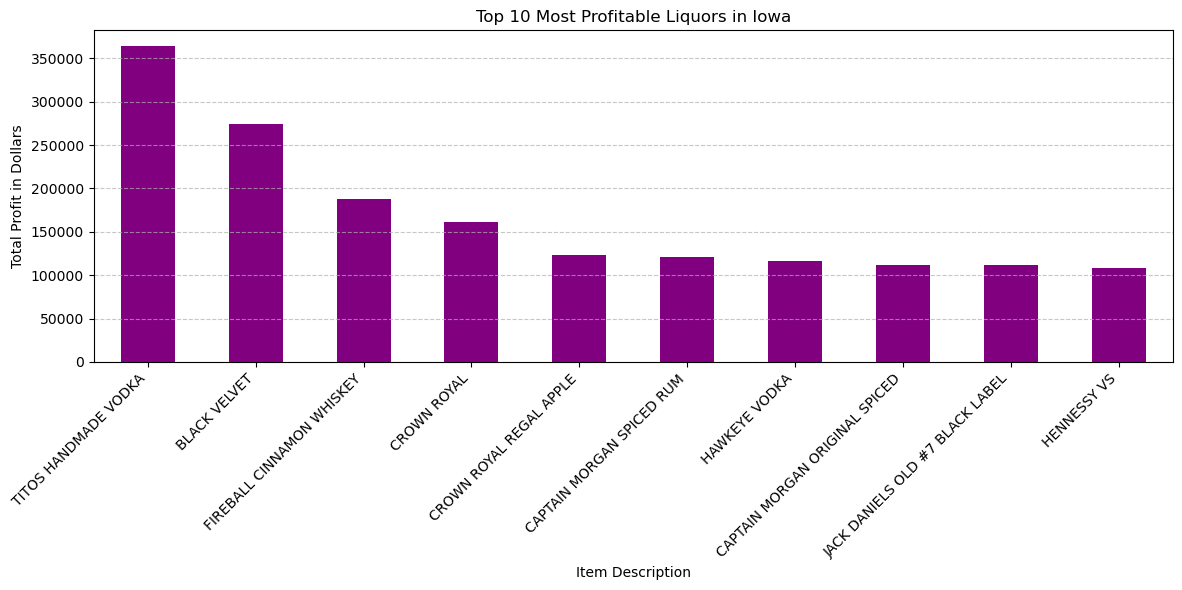

In [89]:
# Plotting the top 10 most profitable liquors
plt.figure(figsize=(12, 6))
profit_by_item.plot(kind="bar", color="purple")
plt.title("Top 10 Most Profitable Liquors in Iowa")
plt.xlabel("Item Description")
plt.ylabel("Total Profit in Dollars")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?

- Instead, try `x.reshape(-1,1)-y.reshape(-1,1)`. What do you get?

- Try `x.reshape(1,-1)-y.reshape(1,-1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 

- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [90]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

In [91]:
#x-y

When you subtract x-y, it throws a ValueError because the vectors are different shapes. 

In [92]:
#x.reshape(-1,1)-y.reshape(-1,1)

When you run this code, it still throws a ValueError because the vectors are still different shapes: (3,1) and (2,1). This means they are column vectors and have that shape. Here's the message I got: "ValueError: operands could not be broadcast together with shapes (3,1) (2,1)"

In [93]:
#x.reshape(1,-1)-y.reshape(1,-1)

When you run this code instead, it throws a ValueError because the vectors are still different shapes. However, it is different from the last code I ran because they are now row vectors with one vector being 1 row and 3 columns and the other being 1 row and 2 columns. Here's the messsage I got: "ValueError: operands could not be broadcast together with shapes (1,3) (1,2)" 

In [94]:
#Two for loops to replicate results of the last two answers 
result = np.zeros((len(x), len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        result[i, j] = x[i] - y[j]

print(result)

[[-1. -4.]
 [ 1. -2.]
 [ 3.  0.]]


How `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$: 
When using the reshape function, it's important to remember that the first number is the number of rows and the second number is the number of columns. The -1 number is a useful function in NumPy that automatically calculates what that dimension needs to be. Since we are constrained by the other number (positive 1), python will figure out what the other dimension has to be. 

So for our example, if x is already an array that looks like [1, 3, 5], then if we apply x.reshape(-1, 1), we are constrained by the column vector for the x vector to have one column. That means there will be 3 rows. So the vector will then look like this: [[1], [3], [5]]. If we apply the x.reshape(1, -1), we are constrained by the row value to have one row. So the number of columns must be 3. The vector, as a result, will remain the same and look like [1, 3, 5]. 

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ is false and 1 if $x \le z$ is true.

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition that
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

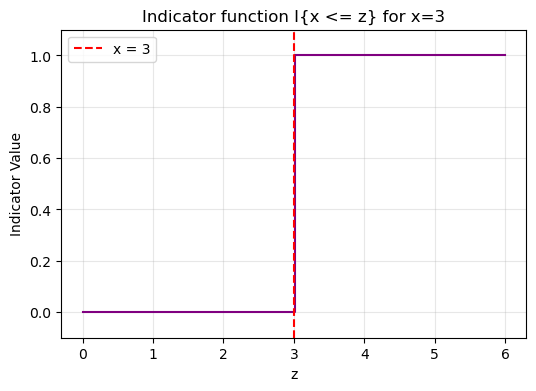

In [95]:
x = 3
z = np.linspace(0, 6, 200)

indicator = (x <= z).astype(int)

plt.figure(figsize=(6,4))
plt.step(z, indicator, where="post", color="purple")
plt.axvline(x, color="red", linestyle="--", label=f"x = {x}")

plt.title("Indicator function I{x <= z} for x=3") 
plt.xlabel ("z")
plt.ylabel("Indicator Value")
plt.ylim(-0.1, 1.1)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

When you subtract the formula from 1, you can see that 1 - I{x <= z} = 1 - 1 = 0. We also know that I{x > z} = 0. Then if I{x<=z} = 0, then 1 - I{x<=z} = 1 - 0 = 1. We also know that I{x > z} = 1. Using simple algebra, we can see that 1 - I{x<=z} = I{x>z}. When looking at a plot, you know that it will look like a step function that drops from 1 to 0 at x = z and steps up when x = z. This means when you subtract I{x<=z} from 1, the functions will look the exact same. 

[-1.93110142 -0.68911772 -0.01982181  0.32557447  0.47475325]
(array([0.2, 0.4, 0.6, 0.8, 1. ]), array([-1.93110142, -0.68911772, -0.01982181,  0.32557447,  0.47475325]))


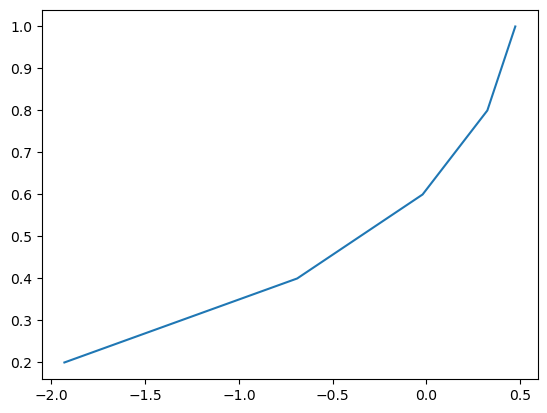

In [96]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,5)
    # ECDF plot goes here:

def ecdf(x, plot = True): 
    grid = np.sort(np.unique(X)) 
    print (grid) 
    ecdf = np.zeros(len(grid)) 

    for idx in range(len(grid)): 
        ecdf[idx] = (X <= grid[idx]).sum() / len(X)
    if plot: 
        plt.plot(grid, ecdf)
    return ecdf, grid
print(ecdf(X))


As the sample size N increases, the ECDF curve slowly becomes smoother and becomes more representative of the distribution. It is more continuous and less jagged and closer to the true ECDF curve. 

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [97]:
#compute quantile without np.quantile 
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9,10])
p = 0.4

def my_quantile(data, p):
    data = sorted(data)
    n = len(data)
    index = (n-1) * p 
    lower_index = int(np.floor(index))
    upper_index = int(np.ceil(index))
    if upper_index == lower_index: 
        return data[lower_index]
    else: 
        frac = index - lower_index
        return (1 - frac) * data[lower_index] + frac * data[upper_index]

my_quantile(x, p) 

np.float64(4.6)

In [98]:
#compute IQR 

def compute_iqr(data): 
    q1 = my_quantile(data, 0.25)
    q3 = my_quantile(data, 0.75)
    iqr = q3 - q1
    lower_whisker = q1 - (1.5 * iqr) 
    upper_whisker = q3 + (1.5 * iqr)
    return iqr, lower_whisker, upper_whisker

compute_iqr(x)


(np.float64(4.5), np.float64(-3.5), np.float64(14.5))

In [99]:
#five number summary function 

def five_number_summary(data): 
    minimum = min(data) 
    q1 = my_quantile(data, 0.25) 
    median = my_quantile(data, 0.5) 
    q3 = my_quantile(data, 0.75) 
    maximum = max(data) 
    iqr, lower_whisker, upper_whisker = compute_iqr(data)
    return minimum, q1, median, q3, maximum, lower_whisker, upper_whisker

five_number_summary(x)

(np.int64(1),
 np.float64(3.25),
 np.float64(5.5),
 np.float64(7.75),
 np.int64(10),
 np.float64(-3.5),
 np.float64(14.5))

In [100]:
def check_outlier(data):
    iqr, lower_whisker, upper_whisker = compute_iqr(data)
    return (data < lower_whisker) | (data > upper_whisker)


check_outlier(df['Bottles Sold'])


0         False
1         False
2         False
3         False
4         False
          ...  
159899    False
159900    False
159901    False
159902    False
159903    False
Name: Bottles Sold, Length: 159904, dtype: bool

In [101]:
df = pd.read_csv('/Users/bellalu/DS 5030/DS5030UnderstandingUncertainty/data/iowa.csv')
#Bottles Sold 

quantile(df['Bottles Sold'], 0.5)

-24.0

In [102]:
compute_iqr(df['Bottles Sold'])


(9.0, -10.5, 25.5)

In [103]:
five_number_summary(df['Bottles Sold'])


(-60, 3.0, 6.0, 12.0, 2400, -10.5, 25.5)

In [104]:
check_outlier(df['Bottles Sold'])

0         False
1         False
2         False
3         False
4         False
          ...  
159899    False
159900    False
159901    False
159902    False
159903    False
Name: Bottles Sold, Length: 159904, dtype: bool

<Axes: ylabel='Bottles Sold'>

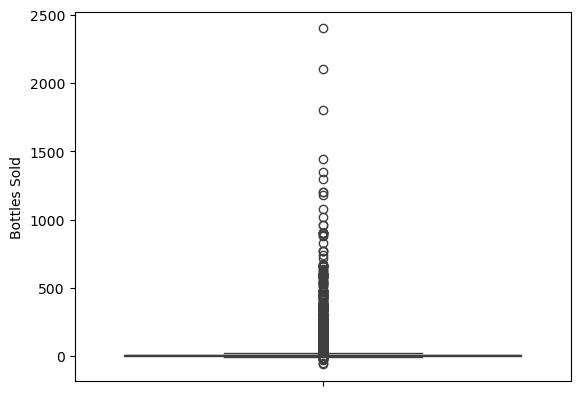

In [105]:
sns.boxplot(df['Bottles Sold'])

In [106]:
df['Bottles Sold'].describe()

count    159904.000000
mean         10.883336
std          28.042635
min         -60.000000
25%           3.000000
50%           6.000000
75%          12.000000
max        2400.000000
Name: Bottles Sold, dtype: float64

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?